## Interactive data visualization

### ECS Hack Week 2019<br>27 May 2019<br>

## Why should electrochemists worry about data visualization?

## Schedule
[Basic usage (defining data, marks, and encodings)](#Basic-usage-(defining-data,-marks,-and-encodings))

[Calculated fields](#Calculated-fields)

[Selections (adding interactivity)](#Selections-(adding-interactivity))

In [48]:
from utilities import build_dataset

data = build_dataset()

In [49]:
data.head()

,frequencies,z_real,z_imag,test,chem,cell,temp
22,630.9573,0.066520,0.000312,LFP_3_Cycling_25C.txt,LFP,3,25.0
23,501.1872,0.066876,0.000838,LFP_3_Cycling_25C.txt,LFP,3,25.0
24,398.1072,0.067235,0.001141,LFP_3_Cycling_25C.txt,LFP,3,25.0
25,316.2278,0.067527,0.001522,LFP_3_Cycling_25C.txt,LFP,3,25.0
26,251.1886,0.068049,0.001617,LFP_3_Cycling_25C.txt,LFP,3,25.0


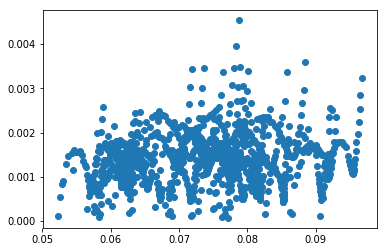

In [50]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(data['z_real'], data['z_imag'], 'o', label=chem)
plt.show()

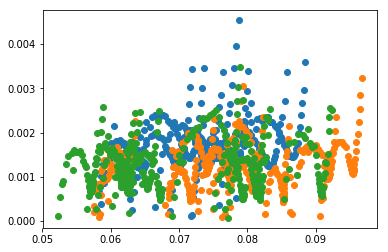

In [51]:
import matplotlib.pyplot as plt

fig = plt.figure()
for chem in data['chem'].unique():
    plt.plot(data[data['chem'] == chem]['z_real'], data[data['chem'] == chem]['z_imag'], 'o', label=chem)
    
plt.show()

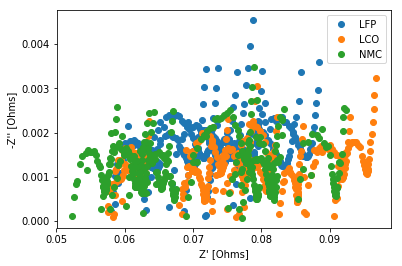

In [52]:
import matplotlib.pyplot as plt

fig = plt.figure()
for chem in data['chem'].unique():
    plt.plot(data[data['chem'] == chem]['z_real'], data[data['chem'] == chem]['z_imag'], 'o', label=chem)
    
plt.xlabel("Z' [Ohms]")
plt.ylabel("-Z'' [Ohms]")
plt.legend()
plt.show()

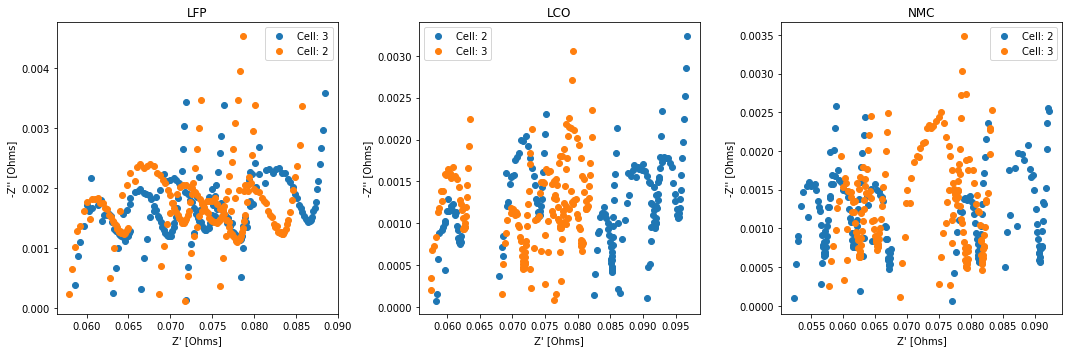

In [62]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=3, figsize=(15,5))
for ax, chem in zip(ax, data['chem'].unique()):
    subset = data[data['chem'] == chem]
    for cell in subset['cell'].unique():
        ax.plot(subset[subset['cell'] == cell]['z_real'], 
                subset[subset['cell'] == cell]['z_imag'], 
                'o', label='Cell: {}'.format(cell))
        ax.set_title(chem)
    ax.set_xlabel("Z' [Ohms]")
    ax.set_ylabel("-Z'' [Ohms]")
    ax.legend()
    
plt.tight_layout()
plt.show()

| <h2>Imperative</h2> | <h2>Declarative</h2> | 
| ------------- |-------------|
| <h2>Specify How something should be done.</h2> | <h2>Specify What should be done.</h2> |
| <h2>Specification & Execution intertwined.</h2> | <h2>Separates Specification from Execution</h2> |
| <h2>“Put a red circle here and a blue circle here”</h2> | <h2>“Map x to a position, and y to a color”</h2> |

<br><br><br>
Declarative visualization lets you think about data and relationships, rather than incidental details.
    
<a href='https://speakerdeck.com/jakevdp/altair-tutorial-intro-pycon-2018?slide=17'>*taken from Jake VanderPlas' Altair talk at Pycon 2018</a>

#### Basic usage (defining data, marks, and encodings)

In [63]:
import altair as alt
from utilities import build_dataset

data = build_dataset()

data.head()

,frequencies,z_real,z_imag,test,chem,cell,temp
22,630.9573,0.066520,0.000312,LFP_3_Cycling_25C.txt,LFP,3,25.0
23,501.1872,0.066876,0.000838,LFP_3_Cycling_25C.txt,LFP,3,25.0
24,398.1072,0.067235,0.001141,LFP_3_Cycling_25C.txt,LFP,3,25.0
25,316.2278,0.067527,0.001522,LFP_3_Cycling_25C.txt,LFP,3,25.0
26,251.1886,0.068049,0.001617,LFP_3_Cycling_25C.txt,LFP,3,25.0


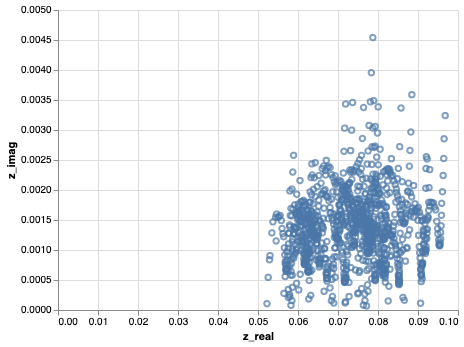

In [4]:
alt.Chart(data).mark_point().encode(
    x='z_real:Q',
    y='z_imag:Q',
)

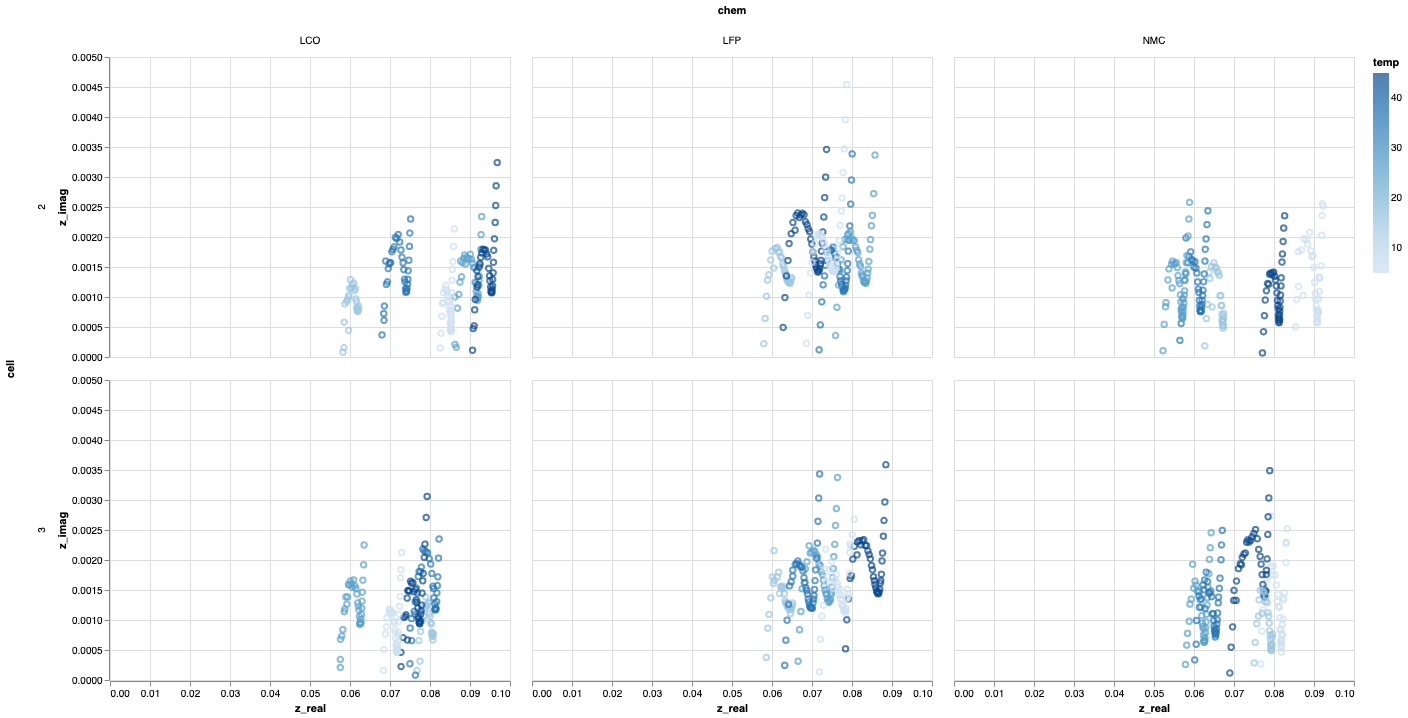

In [5]:
alt.Chart(data).mark_point().encode(
    x='z_real:Q',
    y='z_imag:Q',
    color='temp'
).facet(column='chem', row='cell')

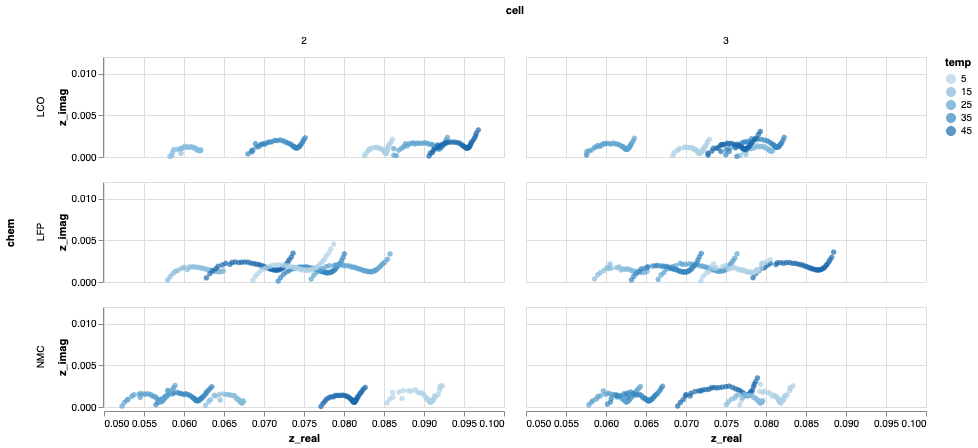

In [7]:
from utilities import get_ranges
min_x, max_x, min_y, max_y = get_ranges(data, y_scale=4)

alt.Chart(data).mark_circle().encode(
    x=alt.X('z_real:Q', scale=alt.Scale(zero=False, domain=[min_x, max_x])),
    y=alt.Y('z_imag:Q', scale=alt.Scale(zero=False, domain=[min_y, max_y])),
    color='temp:O'
).properties(
    width=400,
    height=100
).facet(row='chem', column='cell')

### Calculated fields

In [64]:
subset = data[data.chem == 'LFP']
subset = subset[subset.cell == '2']

In [65]:
subset.head()

,frequencies,z_real,z_imag,test,chem,cell,temp
22,630.9573,0.057948,0.000222,LFP_2_Cycling_15C.txt,LFP,2,15.0
23,501.1872,0.058265,0.000643,LFP_2_Cycling_15C.txt,LFP,2,15.0
24,398.1072,0.058611,0.001013,LFP_2_Cycling_15C.txt,LFP,2,15.0
25,316.2278,0.058902,0.001280,LFP_2_Cycling_15C.txt,LFP,2,15.0
26,251.1886,0.059224,0.001371,LFP_2_Cycling_15C.txt,LFP,2,15.0


In [75]:
bode_mag =  alt.Chart(subset).mark_circle().encode(
    x=alt.X('frequencies', scale=alt.Scale(type='log')),
    y=alt.Y('magnitude:Q', scale=alt.Scale(zero=False)),
    color='temp:O'
).transform_calculate(
    magnitude='sqrt(pow(datum.z_real, 2) + pow(datum.z_imag, 2))'
)

In [74]:
bode_phase = alt.Chart(subset).mark_circle().encode(
    x=alt.X('frequencies', scale=alt.Scale(type='log')),
    y=alt.Y('phase:Q', scale=alt.Scale(notathing=3, zero=False)),
    color='temp:O'
).transform_calculate(
    magnitude='sqrt(pow(datum.z_real, 2) + pow(datum.z_imag, 2))',
    phase='atan2(datum.z_imag, datum.z_real)'
)

SchemaValidationError: Invalid specification

        altair.vegalite.v3.schema.core.Scale, validating 'additionalProperties'

        Additional properties are not allowed ('notathing' was unexpected)
        

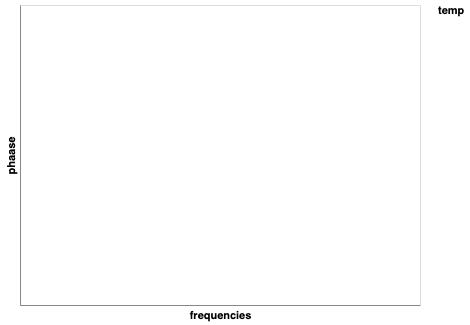

In [73]:
bode_phase

### Selections (adding interactivity)

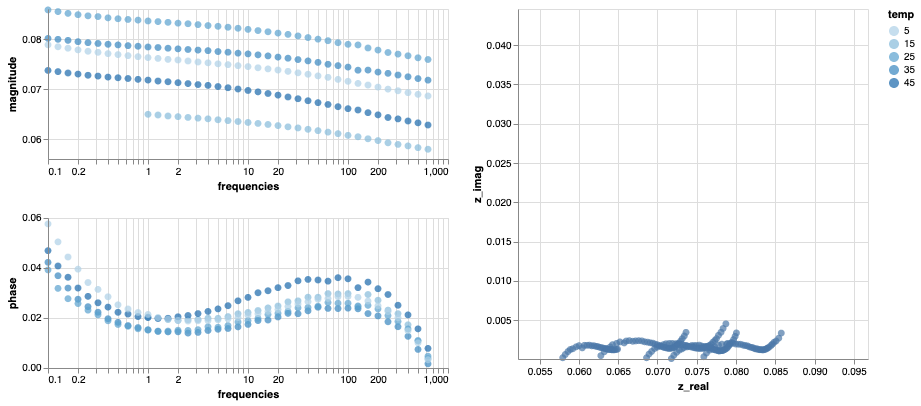

In [34]:
selection = alt.selection_single(fields=['temp'], nearest=True, on='mouseover')

bode_mag = alt.Chart(subset).mark_circle().encode(
    x=alt.X('frequencies', scale=alt.Scale(type='log')),
    y=alt.Y('magnitude:Q', scale=alt.Scale(zero=False)),
    color='temp:O',
    size=alt.condition(selection, alt.value(48), alt.value(18))
).transform_calculate(
    magnitude='sqrt(pow(datum.z_real, 2) + pow(datum.z_imag, 2))'
).add_selection(
    selection
).properties(height=150)

bode_phase = alt.Chart(subset).mark_circle().encode(
    x=alt.X('frequencies', scale=alt.Scale(type='log')),
    y=alt.Y('phase:Q', scale=alt.Scale(zero=False)),
    color='temp:O',
    size=alt.condition(selection, alt.value(48), alt.value(18))
).transform_calculate(
    magnitude='sqrt(pow(datum.z_real, 2) + pow(datum.z_imag, 2))',
    phase='atan2(datum.z_imag, datum.z_real)'
).add_selection(
    selection
).properties(height=150)

min_x, max_x, min_y, max_y = get_ranges(data, y_scale=1)

nyquist = alt.Chart(subset).mark_circle().encode(
    x=alt.X('z_real:Q', scale=alt.Scale(zero=False, nice=False, domain=[min_x, max_x])),
    y=alt.Y('z_imag:Q', scale=alt.Scale(zero=False, nice=False, domain=[min_y, max_y])),
    size=alt.condition(selection, alt.value(48), alt.value(18)),
    tooltip=['temp']
).properties(
    width=350,
    height=350
)

bode_mag & bode_phase | nyquist.add_selection(selection)